# 1. 이론 주관식
## 1. 과적합이란?
    모델이 학습 데이터에만 과도하게 최적화되어서, 실제 예측을 다른 데이터로 수행할 경우에 예측 성능이 과도하게 떨어지는 것.
## 2. 과적합을 개선하기 위한 방법 한가지 이상
    (1) 교차검증
    (2) 데이터 양 늘리기
    (3) 모델의 복잡도 줄이기 (정규화)
## 3. Imbalanced 분포도를 가진 레이블 데이터 집합에서 사용하는 검증 방법을 찾고 그 방법을 간단하게 설명하시오.
**Stratified K 폴드**: 
    레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요하다.
    for문에서 피쳐와 데이터 세트를 넣어 n개의 폴드로 나누어진 훈련용, 테스트용 index들을 순서대로 X, y test, train 값에 넣어주고,
    각각의 accuracy를 평균낸 것이 결과가 된다.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
dt_clf = DecisionTreeClassifier(random_state=156)

iris = load_iris()
features = iris.data
label = iris.target


skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter +=1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
    print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
    print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도: [0.98]
## 평균 검증 정확도: 0.98

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도: [0.98 0.94]
## 평균 검증 정확도: 0.96

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


## 4. Data Prepocessing (데이터 전처리)에서 인코딩(encoding)을 하는 이유
    사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않기때문이다.
    따라서 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해주어야 한다.
## 5. One-hot encoding의 단점
    (1) 저장공간 측면에서 비효율적이다.
    (2) 유사도를 표현하지 못한다.
## 6. 데이터의 스케일링 변환시 유의해야할 점
    Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시fit()을 수행하지 않고, 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야한다.
    학습데이터 세트로 fit된 Scaler 객체를 사용해야 스케일링 범위가 똑같이 일치되기 때문이다.

# 2. Coding part
## 1. 데이터 불러오기

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [13]:
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,N,4.0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,N,6.0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,Y,7.0,1


In [14]:
print('\n ### train 데이터 정보 ### \n')
print(heart_df.info())


 ### train 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       281 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  298 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         292 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 294 non-null    float64
 7   serum_creatinine          297 non-null    float64
 8   serum_sodium              296 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    object 
 11  time                      295 non-null    float64
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(7), int64(5), object(1)
memor

## 2. 결손 데이터 확인

In [19]:
print('데이터 세트 NULL 값 개수\n', heart_df.isna().sum())

데이터 세트 NULL 값 개수
 age                         18
anaemia                      0
creatinine_phosphokinase     1
diabetes                     0
ejection_fraction            7
high_blood_pressure          0
platelets                    5
serum_creatinine             2
serum_sodium                 3
sex                          0
smoking                      0
time                         4
DEATH_EVENT                  0
dtype: int64


In [53]:
type(heart_df.isna().sum())
null_names = np.array([ i for i in heart_df.isna().sum().index if heart_df.isna().sum()[i] !=0 ])

print(type(null_names))
null_names

<class 'numpy.ndarray'>


array(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'serum_sodium', 'time'],
      dtype='<U24')

In [68]:
for null_name in null_names:
    heart_df[null_name].fillna(heart_df[null_name].mean(), inplace=True)
heart_df['age'] = round(heart_df['age'])

In [72]:
print('데이터 세트 Null 값 갯수 \n', heart_df.isnull().sum())

데이터 세트 Null 값 갯수 
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


## 3. 나이, 성별, 흡연 여부로 다양하게 분포 파악하기

In [73]:
print(' Sex 값 분포 :\n{0}\n'.format(heart_df['sex'].value_counts()) )
print('\n age 값 분포: \n{0}\n'.format(heart_df['age'].value_counts()))
print('\n smoking 값 분포: \n{0}\n'.format(heart_df['smoking'].value_counts()))

 Sex 값 분포 :
1    194
0    105
Name: sex, dtype: int64


 age 값 분포: 
60.0    30
50.0    25
70.0    25
65.0    24
61.0    23
55.0    17
45.0    17
58.0    10
75.0    10
53.0     9
40.0     7
72.0     7
80.0     7
42.0     7
85.0     6
63.0     6
62.0     5
52.0     5
68.0     4
49.0     4
51.0     4
59.0     4
73.0     4
82.0     3
69.0     3
64.0     3
66.0     2
46.0     2
57.0     2
44.0     2
54.0     2
67.0     2
95.0     2
77.0     2
48.0     2
90.0     2
56.0     1
87.0     1
81.0     1
78.0     1
86.0     1
41.0     1
43.0     1
94.0     1
79.0     1
47.0     1
Name: age, dtype: int64


 smoking 값 분포: 
N    203
Y     96
Name: smoking, dtype: int64



In [80]:
heart_df.groupby(['sex', 'DEATH_EVENT'])['DEATH_EVENT'].count()

sex  DEATH_EVENT
0    0               71
     1               34
1    0              132
     1               62
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='DEATH_EVENT'>

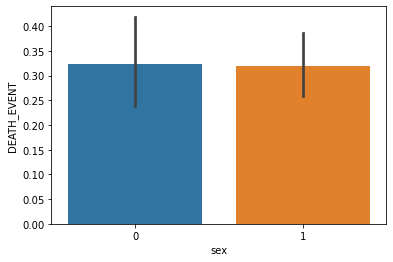

In [81]:
sns.barplot(x='sex', y = 'DEATH_EVENT', data=heart_df)

<AxesSubplot:xlabel='smoking', ylabel='DEATH_EVENT'>

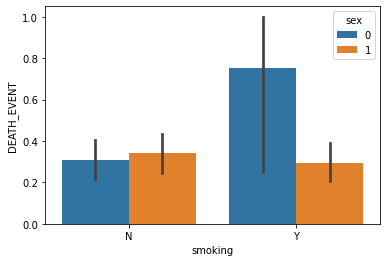

In [83]:
sns.barplot(x='smoking', y = 'DEATH_EVENT', hue = 'sex', data=heart_df)

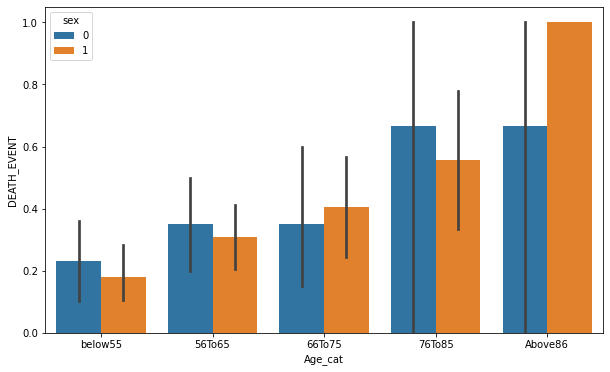

In [84]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= 55: cat = 'below55'
    elif age <= 65: cat = '56To65'
    elif age <= 75: cat = '66To75'
    elif age <= 85: cat = '76To85'
    else : cat = 'Above86'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['below55', '56To65', '66To75', '76To85', 'Above86']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
heart_df['Age_cat'] = heart_df['age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='DEATH_EVENT', hue='sex', data=heart_df, order=group_names)
heart_df.drop('Age_cat', axis=1, inplace=True)


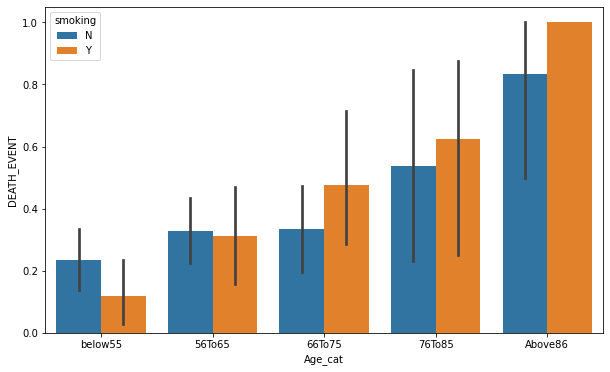

In [86]:
plt.figure(figsize=(10,6))
heart_df['Age_cat'] = heart_df['age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='DEATH_EVENT', hue='smoking', data=heart_df, order=group_names)
heart_df.drop('Age_cat', axis=1, inplace=True)

## 4. 데이터 전처리

In [87]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['smoking']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

heart_df = encode_features(heart_df)
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,4.0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,6.0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,7.0,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,7.0,1
4,65.0,1,160.0,1,20.0,0,327000.00,2.7,116.0,0,0,8.0,1


## 5. Null 처리 & 불필요 feature 제거 & 레이블 인코딩 & 새로 호출

In [98]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    null_names = np.array([ i for i in heart_df.isna().sum().index if heart_df.isna().sum()[i] !=0 ])
    for null_name in null_names:
        df[null_name].fillna(heart_df[null_name].mean(), inplace=True)
    df['age'] = round(df['age'])
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['time'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    features = ['smoking']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df): 
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

## 6. 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출.

In [99]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
y_heart_df = heart_df['DEATH_EVENT']
X_heart_df= heart_df.drop('DEATH_EVENT',axis=1)
X_heart_df = transform_features(X_heart_df)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_heart_df, y_heart_df, 
                                                  test_size=0.3, random_state=2021)

## 7. 결정트리, Random Forest, 로지스틱 회귀로 데이터를 학습시키고 각 classifier에서 정확도 도출

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=2021)
rf_clf = RandomForestClassifier(random_state=2021)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
df_clf.fit(X_train, y_train)
df_pred = df_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, df_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7000
RandomForestClassifier 정확도: 0.7667
LogisticRegression 정확도: 0.7667


## 8. KFold 이용 (fold = 5)

In [104]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_heart_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_heart_df.values[train_index], X_heart_df.values[test_index]
        y_train, y_test = y_heart_df.values[train_index], y_heart_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        ac = accuracy_score(y_test, pred)
        scores.append(ac)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, ac))
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.3000
교차 검증 1 정확도: 0.6333
교차 검증 2 정확도: 0.7333
교차 검증 3 정확도: 0.6833
교차 검증 4 정확도: 0.7288
평균 정확도: 0.6158


## 9. cross_val_score 사용

In [105]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_heart_df , y_heart_df , cv=5)
for iter_count, ac in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, ac))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.6833
교차 검증 1 정확도: 0.7333
교차 검증 2 정확도: 0.7000
교차 검증 3 정확도: 0.6833
교차 검증 4 정확도: 0.6441
평균 정확도: 0.6888


## 10. GridSearchCV를 이용해서 최적의 hyper-parameter를 구하고 최고의 정확도 구해보기

In [110]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_dclf.best_score_) )
best_dclf = grid_dclf.best_estimator_

dpred = best_dclf.predict(X_test)
ac = accuracy_score(y_test, dpred)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(ac))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.7179
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.7556
